\begin{equation*}
-u'' + 9u + 2x^{3}sin(2u) = 1 \\
u(0) = u(1) = 0
\end{equation*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Базисные функции $e_j(x)$

In [2]:
def e(x):
    if x >= -1 and x <= 0:
        return 1 + x
    elif x >= 0 and x <= 1:
        return 1 - x
    else:
        return 0
    
def e_j(x, x_j, h):
    return e((x - x_j) / h)

Функция для определения $\tilde{Ф}(c)$

In [3]:
def Phi(c, N, h):
    s_1 = c[1:-1] ** 2 - c[1:-1] * (c[:-2] + c[2:])
    s_2 = c[1:-1] ** 2 + 1/2 * c[1:-1] * (c[:-2] + c[2:])
    s_3 = np.arange(1, N + 1) ** 3 * np.cos(2 * c[1:-1])
    Phi = 1/h * np.sum(s_1) + 3 * h * np.sum(s_2) + 1/4 - h/2 - h ** 4 * np.sum(s_3) - h * np.sum(c) 
    return Phi

Функция для определения $c^{(k+1)} = c^{(k)} - w * h * grad\tilde{Ф}(c^{(k)})$

In [4]:
def c_k(c, k, N, h, w):
    c_k = np.zeros(N + 2)
    if k - 1 == 0:
        s_1 = 2 * c[1:-1] - c[:-2] - c[2:]
        s_2 = 2 * c[1:-1] + 1/2 * (c[:-2] + c[2:])
        c_k[1:-1] = c[1:-1] - w * (s_1 + 3 * h**2 * s_2 + 2 * h**5 * np.arange(1, N + 1)**3 * np.sin(2 * c[1:-1]) - h ** 2)
    else:
        s_1 = 2 * c[k - 1, 1:-1] - c[k - 1, :-2] - c[k - 1, 2:]
        s_2 = 2 * c[k - 1, 1:-1] + 1/2 * (c[k - 1, :-2] + c[k - 1, 2:])
        c_k[1:-1] = c[k-1, 1:-1] - w * (s_1 + 3 * h**2 * s_2 + 2 * h**5 * np.arange(1, N+1)**3 * np.sin(2 * c[k-1, 1:-1]) - h**2)
    return c_k

Функция минимизации

In [5]:
def minimize(c, k, N, h, w_min):
    w = 1
    if k == 1:
        c = np.vstack([c, c_k(c, k, N, h, w)])
    else:
        c = np.vstack([c, c_k(c[k - 1], k, N, h, w)])
        
    while Phi(c[k], N, h) > Phi(c[k - 1], N, h) and w > w_min:
        w /= 2
        c[k] = c_k(c[k - 1], k, N, h, w)
    if w <= w_min:
        return c, k - 1
    else:
        minimize(c, k + 1, N, h, w_min)

## Решение при $N = 9$

In [6]:
N = 9
h = 1 / (N + 1)
x_j = np.arange(0, 1 + h, h)
c = np.zeros(N + 2)
c[1:N + 1] = 1 - (np.exp(x_j[1:N+1]) + np.exp(1 - x_j[1:N+1])) / (1 + np.exp(1))
w_min = 0.00001

c, k = minimize(c, 1, N, h, w_min)
print('Порядок приближения =', k)

Порядок приближения = 0


Получили минимум функционала $\tilde{Ф}(c^{(k)})$ при $c^{(0)}$

Text(0, 0.5, 'u(x)')

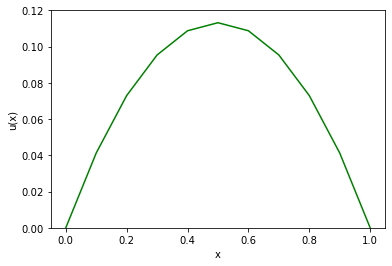

In [7]:
x = np.linspace(0, 1, len(x_j))
u = np.zeros(len(x))
v_ej = np.vectorize(e_j)
for i in range(len(u)):
    u[i] = np.sum(c[k, 1:-1] * v_ej(x[i], x_j[1:-1], h))
fig, ax = plt.subplots()

ax.plot(x, u, color = 'green')
ax.set_ylim(0, 0.12)
ax.set_xlabel('x')
ax.set_ylabel('u(x)')

## Решение при $N = 99$

In [8]:
N = 99
h = 1 / (N + 1)
x_j = np.arange(0, 1 + h, h)
c = np.zeros(N + 2)
c[1:N + 1] = 1 - (np.exp(x_j[1:N+1]) + np.exp(1 - x_j[1:N+1])) / (1 + np.exp(1))
w_min = 0.00001

c, k = minimize(c, 1, N, h, w_min)
print('Порядок приближения =', k)

Порядок приближения = 0


Получили минимум функционала $\tilde{Ф}(c^{(k)})$ при $c^{(0)}$

Text(0, 0.5, 'u(x)')

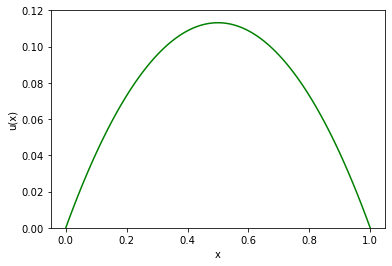

In [9]:
x = np.linspace(0, 1, len(x_j))
u = np.zeros(len(x))
v_ej = np.vectorize(e_j)
for i in range(len(u)):
    u[i] = np.sum(c[k, 1:-1] * v_ej(x[i], x_j[1:-1], h))
fig, ax = plt.subplots()

ax.plot(x, u, color = 'green')
ax.set_ylim(0, 0.12)
ax.set_xlabel('x')
ax.set_ylabel('u(x)')